In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append('../')

from R.models import *
from R.data import *
from R.paths import *
from R.relative_depth import *

rcpsize = 20
plt.rcParams['xtick.labelsize']= rcpsize
plt.rcParams['ytick.labelsize']=rcpsize
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = rcpsize
plt.rcParams.update({'figure.autolayout': True})
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['ggplot']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8-dark-palette']['axes.prop_cycle'].by_key()['color']
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
# print(plt.rcParams.keys())
#np.set_printoptions(precision=None)
markers = ['p','o','h','^','s']
plot_id = 0

### for legend outside plot:
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/home/sacevedo/my_env/lib64/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in /home/sacevedo/.cache/torch/hub/pytorch_vision_v0.10.0
/home/sacevedo/my_env/lib64/python3.8/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/home/sacevedo/my_env/lib64/python3.8/site-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/home/sacevedo/my_env/lib64/python3.8/site-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/home/sacevedo/my_env/lib64/python3.8/site-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'tor

# Crop size dependence

model_name='resnet18'


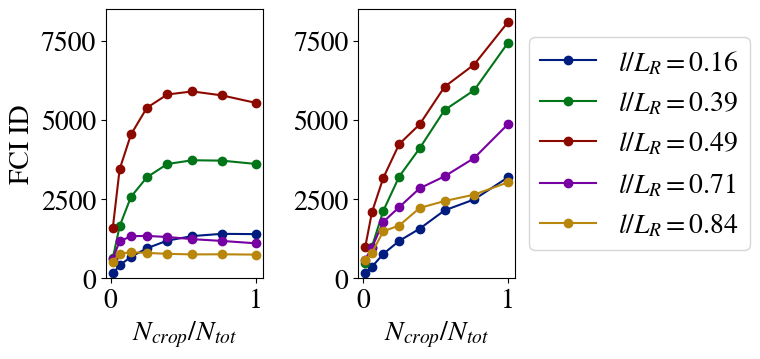

In [20]:
model_id = 0
model_name,W_model = model_list[model_id]
print(f'{model_name=}')
layer_names = layers_dict[model_name][:] 
class_list = list(class_dict.keys())[:]

layer_ids = [0,2,3,5,6]
_relative_depth_dict = [relative_depth_dict[model_name][idx] for idx in layer_ids]
class_ids = [0,1,2,3,4,5,6]
crop_sizes = 28 * np.arange(1,8+1,dtype=int)

shuffle_flags = [0,1]
IDs = np.zeros(shape=(len(layer_ids),
                      len(class_ids),
                      len(crop_sizes),
                      len(shuffle_flags))
                      )
fig,axs = plt.subplots(1,2,figsize=(8,4))

for shuffle_id,shuffle in enumerate(shuffle_flags):
  for index_l,layer_id in enumerate(layer_ids):
    for index_c,class_id in enumerate(class_ids):
      for index_crop,crop_size in enumerate(crop_sizes):
        layer_name = layer_names[layer_id]
        key = class_list[class_id]
        base = f'results/FCI/'
        if shuffle:
          base += 'shuffle/'
          key=class_id
        resultsfolder = makefolder(base=base,
                              create_folder=False,
                              crop_size=crop_size,
                              key=key,
                              layer_id=layer_id,
                              )
        filename='FCI.txt'
        (d,x0,err) = np.loadtxt(resultsfolder+filename,unpack=True)
        IDs[index_l,index_c,index_crop,shuffle_id] = d

mean_IDs = np.mean(IDs,axis=1)
std_IDs = np.std(IDs,axis=1)

for shuffle_id, shuffle in enumerate(shuffle_flags):
  for layer_index,layer_id in enumerate(layer_ids):
    if shuffle:
      lbl = r'$l/L_R=$' + f'{_relative_depth_dict[layer_index]:.2f}'
    else:
      lbl = None
    axs[shuffle_id].plot(crop_sizes**2 / crop_sizes[-1]**2,
                mean_IDs[layer_index,:,shuffle_id],
                # std_IDs[layer_index,:,shuffle_id],
                # fmt='-o',
                'o-',
                label=lbl,
                # color=colors[shuffle],
                )

box = axs[1].get_position()
axs[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[1].set_xlabel(r'$N_{crop}/N_{tot}$')
axs[0].set_xlabel(r'$N_{crop}/N_{tot}$')
axs[0].set_ylabel(f'FCI ID')

axs[0].set_ylim(0,np.max(mean_IDs)*1.05)
axs[1].set_ylim(0,np.max(mean_IDs)*1.05)

# ymin, ymax = min(ax.get_ylim()[0] for ax in axs), max(ax.get_ylim()[1] for ax in axs)
# for ax in axs:
#     ax.set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()

In [18]:
fig.savefig(f'results/FCI_Resnet.pdf')